In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\595217\Downloads\checkbook_data.csv', parse_dates=['check_date'])

In [4]:
df.set_index('check_date', inplace=True)
df.columns = map(str.lower, df.columns) # lowercase the column names

In [5]:
#df.isnull().sum() #was used to check for null values in records
df = df.dropna() #Instead, drop the 84 records which contain null values in multiple columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64465 entries, 2016-10-07 to 2017-08-25
Data columns (total 18 columns):
fy                     64465 non-null int64
period                 64465 non-null int64
month                  64465 non-null object
department             64465 non-null object
division               64465 non-null object
key                    64465 non-null float64
account_description    64465 non-null object
account_type           64465 non-null object
activity               64465 non-null object
amount                 64465 non-null float64
payment_method         64465 non-null object
fund                   64465 non-null object
vendor_id              64465 non-null object
vendor_name            64465 non-null object
check_no               64465 non-null int64
invoice                64465 non-null object
expense_group          64465 non-null object
expense_type           64465 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 9.3+ MB


In [7]:
df.expense_group.value_counts()[df.expense_group.value_counts() < 15].reset_index()

,index,expense_group
0,AUDITING SERVICES,14
1,CITY FUNDED PENSION/SEMI-MONTH,14
2,FOOD CONTRACT,13
3,CONTRACTUAL,13
4,CITY-CO HUMANE SOCIETY,13
5,FLEET EQUIPMENT >5000,12
6,LIABILITY INSURANCE,12
7,ALA SHAKESPEARE FESTIVAL,12
8,ECONOMIC DEVELOPMENT/CHAMBER,12
9,SALES & USE/CITY,12


In [8]:
df.expense_type.value_counts()[df.expense_type.value_counts() < 15].reset_index()

,index,expense_type
0,CITY FUNDED PENSION PLAN BENEF,14
1,PERMITS,13
2,REVENUE-TENNIS FACILITY,12
3,PROCEEDS/SALE OF ASSETS,12
4,OTHER CAPITAL OUTLAY,11
5,SALARIES,9
6,OPERATING CASH,8
7,REVENUE-OTHER,4
8,OVERTIME,3
9,PETTY CASH,3


In [9]:
df[df.expense_type == "SALARIES"]

,fy,period,month,department,division,key,account_description,account_type,activity,amount,payment_method,fund,vendor_id,vendor_name,check_no,invoice,expense_group,expense_type
check_date,,,,,,,,,,,,,,,,,,
2016-11-04,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,608321,PP22-WC,SALARIES,SALARIES
2016-11-23,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,609236,PP24-WC,SALARIES,SALARIES
2016-11-10,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,608626,PP23-WC,SALARIES,SALARIES
2016-12-09,2017,3,December,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,609823,PP25-WC,SALARIES,SALARIES
2016-10-14,2017,1,October,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,141.06,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,607323,PP21-WC,SALARIES,SALARIES
2017-01-20,2017,4,January,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,611572,PP2-WC,SALARIES,SALARIES
2016-10-14,2017,1,October,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,94.02,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,607323,PP21-WC,SALARIES,SALARIES
2017-01-06,2017,4,January,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,610992,PP1-WC,SALARIES,SALARIES
2016-12-23,2017,3,December,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,610489,PP26-WC,SALARIES,SALARIES


In [10]:
df[df.vendor_name == "MCBRIDE TEKARI D"]

,fy,period,month,department,division,key,account_description,account_type,activity,amount,payment_method,fund,vendor_id,vendor_name,check_no,invoice,expense_group,expense_type
check_date,,,,,,,,,,,,,,,,,,
2016-11-04,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,608321,PP22-WC,SALARIES,SALARIES
2016-11-23,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,609236,PP24-WC,SALARIES,SALARIES
2016-11-10,2017,2,November,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,608626,PP23-WC,SALARIES,SALARIES
2016-12-09,2017,3,December,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,609823,PP25-WC,SALARIES,SALARIES
2016-10-14,2017,1,October,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,141.06,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,607323,PP21-WC,SALARIES,SALARIES
2017-01-20,2017,4,January,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,611572,PP2-WC,SALARIES,SALARIES
2016-10-14,2017,1,October,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,94.02,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,607323,PP21-WC,SALARIES,SALARIES
2017-01-06,2017,4,January,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,610992,PP1-WC,SALARIES,SALARIES
2016-12-23,2017,3,December,SANITATION,OPERATIONS DIVISION,15010.0,SANITATION DEPT/OPERATIONS,SALARIES,PUBLIC WORKS,235.08,CHK,GENERAL,EMP18499,MCBRIDE TEKARI D,610489,PP26-WC,SALARIES,SALARIES


In [11]:
len(df[pd.isnull(df.expense_type)])

0

In [12]:
df[np.isfinite(df['amount'])]

,fy,period,month,department,division,key,account_description,account_type,activity,amount,payment_method,fund,vendor_id,vendor_name,check_no,invoice,expense_group,expense_type
check_date,,,,,,,,,,,,,,,,,,
2016-10-07,2017,1,October,CITY EVENTS,CITY EVENTS,12201.0,CITY EVENTS,ADVERTISING,CULTURAL AND RECREATIONAL,710.00,CHK,GENERAL,0004163,WAKA TV CHANNEL 8,607170,207333-12(WAKA),ADVERTISING,"ADV, DUES, & SUBSCRIPTIONS"
2017-01-12,2017,4,January,Non-Departmental,Non-Divisional,10000.0,ASSET/LIABILITY/REVENUE,AUTO PARTS & LUBRICANTS,NON EXPLICABLE,146.26,EPY1,GENERAL,0002917,STORE ROOM FASTENERS INC,6489,5275416,AUTO PARTS & LUBRICANTS,INVENTORIES-OPERATIONAL
2017-02-15,2017,5,February,BUILDING MAINTENANCE,BUILDING MAINTENANCE DIV,18105.0,BUILDING MAINTENANCE,REPAIRS & MAINTENANCE-BUILDING,CULTURAL AND RECREATIONAL,159.99,EPY1,GENERAL,0014143,INLINE ELECTRIC SUPPLY CO OF M,6774,S3020419.001,REPAIRS & MAINTENANCE-BUILDING,REPAIRS & MAINTENANCE
2016-12-16,2017,3,December,Non-Departmental,Non-Divisional,10000.0,ASSET/LIABILITY/REVENUE,AUTO PARTS & LUBRICANTS,NON EXPLICABLE,60.92,CHK,GENERAL,0017037,ADVANCE AUTO PARTS *E,609925,2762-466740,AUTO PARTS & LUBRICANTS,INVENTORIES-OPERATIONAL
2017-02-24,2017,5,February,PARKS & RECREATION,PARKS DIVISION,18215.0,LEISURE/PARKS,UTILITIES,CULTURAL AND RECREATIONAL,95.02,CHK,GENERAL,0000229,AL POWER COMPANY,612916,14237.131,UTILITIES,UTILITIES
2016-11-10,2017,2,November,Non-Departmental,Non-Divisional,10000.0,ASSET/LIABILITY/REVENUE,AUTO PARTS & LUBRICANTS,NON EXPLICABLE,472.53,CHK,GENERAL,0007436,HARLEY-DAVIDSON OF MONTG INC,608607,401790,AUTO PARTS & LUBRICANTS,INVENTORIES-OPERATIONAL
2017-02-24,2017,5,February,MONTGOMERY ZOO,ZOO,5008801.0,MONTGOMERY ZOO,UTILITIES,Montgomery Zoo,363.32,CHK,MONTGOMERY ZOO FUND,0000229,AL POWER COMPANY,612916,14237.143,UTILITIES,UTILITIES
2017-02-24,2017,5,February,PARKS & RECREATION,RECREATION DIVISION,18225.0,LEISURE/RECREATION,MISC DONATIONS,CULTURAL AND RECREATIONAL,5625.00,CHK,GENERAL,0903330,MONTG BALLET INC,613118,02082017,MISC DONATIONS,OTHER EXPENSE
2017-01-13,2017,4,January,POLICE,UNIFORM DIVISION,16210.0,POLICE/UNIFORM,NON-WIRED COMMUNICATIONS,PUBLIC SAFETY,17.71,CHK,GENERAL,0008395,T-MOBILE USA INC,611413,DTD 12/23/16,NON-WIRED COMMUNICATIONS,UTILITIES


In [13]:
df.get_dtype_counts()

float64     2
int64       3
object     13
dtype: int64

In [14]:
df.describe()

,fy,period,key,amount,check_no
count,64465.0,64465.000000,6.446500e+04,64465.000000,64465.000000
mean,2017.0,6.566447,7.580350e+05,1641.107198,445373.325619
std,0.0,3.381723,1.688951e+06,12768.503756,272258.677598
min,2017.0,1.000000,1.000000e+04,-197192.790000,5570.000000
25%,2017.0,4.000000,1.501000e+04,46.000000,8663.000000
50%,2017.0,7.000000,1.642500e+04,133.650000,611495.000000
75%,2017.0,9.000000,1.860100e+04,450.000000,616834.000000
max,2017.0,12.000000,6.816222e+06,736594.000000,622784.000000


In [15]:
shuffle_index = np.random.permutation(64581)

In [16]:
from sklearn.model_selection import ShuffleSplit


KeyError: 'Column not found: Amount'

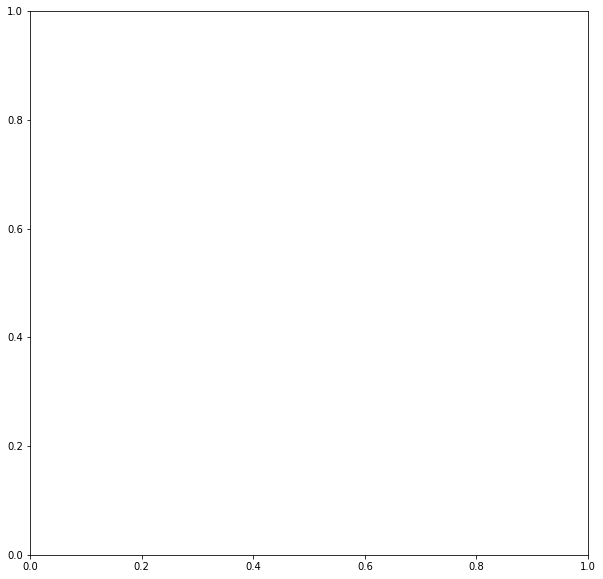

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
df.groupby(by='department')['Amount'].sum().sort_values().tail(10).plot(kind='barh')
ax.set_title('Spending by Department Top 10')
ax.set_xticklabels(('$0', '$100,000', '$200,000', '$300,000', '$400,000'))
ax.set_ylabel('Department')
plt.show()

In [ ]:
df.info()

In [ ]:
grouped = df.groupby(by='department')

In [ ]:
grouped['Amount'].agg([np.sum, np.mean, np.std, np.max, np.min])

In [ ]:
(df.division == df.account_description).sum()

In [ ]:
df.groupby('department').size()

In [ ]:
df.groupby('activity')['Amount'].sum().sort_values().plot(kind='barh')

In [ ]:
df.iloc[18].division == df.iloc[18].account_description

In [ ]:
bins = [-9999999, 0, 1000, 10000, 100000, 999999]
labels = ['Negative', 'Small', 'Medium', 'Large', 'Huge']
df['amt_size'] = pd.cut(df.Amount, bins, labels=labels)

In [ ]:
df.amt_size.value_counts()

In [ ]:
df.index

In [ ]:
[df[c].value_counts() for c in list(df.select_dtypes(include=['O']).columns)]

In [ ]:
df.iloc[0:1]

In [ ]:
df.division.value_counts()

In [ ]:
df.department.value_counts(sort=False).to_frame().sort_index()

In [ ]:
gdf = df.groupby(['department', 'division', 'expense_type', 'expense_group'])['Amount'].sum().to_frame()

In [ ]:
gdf.loc[('POLICE', 'FIRE')]

In [ ]:
gdf.loc['FIRE']

In [ ]:
gdf.loc['POLICE', 'ADMINISTRATIVE DIVISION']

In [ ]:
gdf.loc[(slice(None), 'ADMINISTRATION DIVISION'),:]

In [ ]:
gdf.loc[(['POLICE', 'FIRE'], ['ADMINISTRATION DIVISION', 'ADMINISTRATIVE DIVISION'], ['UTILITIES']),:]

In [ ]:
gdf.loc[(['POLICE', 'FIRE']),:].groupby('division').sum()

In [ ]:
pow(10, 10)

In [ ]:
gdf.loc['POLICE'].groupby('division').sum()

In [ ]:
gdf.loc['FIRE'].groupby('division').sum()

In [ ]:
gdf.head()

In [ ]:
df.department.value_counts()

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.info()